<a href="https://colab.research.google.com/github/aylinayduvan1/Ko-HoldingBootcampProject/blob/main/verionisleme.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os 
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/spectrograms"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}")

There are 10 directories and 0 images in /content/drive/MyDrive/spectrograms
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/9
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/3
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/0
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/4
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/2
There are 0 directories and 929 images in /content/drive/MyDrive/spectrograms/8
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/5
There are 0 directories and 374 images in /content/drive/MyDrive/spectrograms/6
There are 0 directories and 1000 images in /content/drive/MyDrive/spectrograms/7
There are 0 directories and 429 images in /content/drive/MyDrive/spectrograms/1


In [5]:
groups = len(os.listdir("/content/drive/MyDrive/spectrograms"))
groups

10

In [7]:
import pathlib 
import numpy as np

data_dir = pathlib.Path("/content/drive/MyDrive/spectrograms")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  
print(class_names)

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']


In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class

 
  random_image = random.sample(os.listdir(target_folder), 1)

  
  img = mpimg.imread(target_folder + "/" + random_image[0] )
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image shape: {img.shape}")
  
  return img

Image shape: (374, 500, 4)


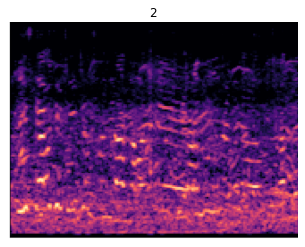

In [9]:
img = view_random_image(target_dir = "/content/drive/MyDrive/spectrograms/",
                        target_class = "2")

In [10]:
import tensorflow as tf
img.shape

(374, 500, 4)

Image shape: (374, 500, 4)
Image shape: (374, 500, 4)
Image shape: (374, 500, 4)


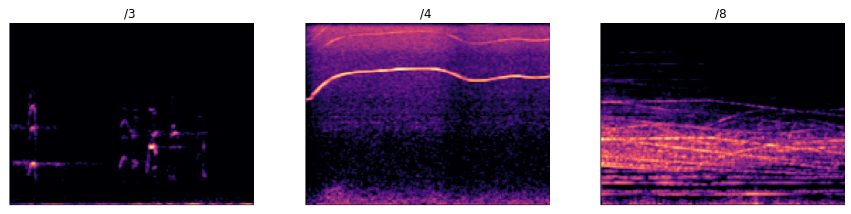

In [11]:
plt.figure(figsize = (15,7))
plt.subplot(1,3,1)
steak_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/3")
plt.subplot(1,3,2)
pizza_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/4")
plt.subplot(1,3,3)
pizza_image = view_random_image("/content/drive/MyDrive/spectrograms/", "/8")

In [12]:
# Import TensorFlow
import tensorflow as tf

# Import Numpy ,Pandas and Matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# import openCV
import cv2

# Import Label Encoder and train_test_split
from sklearn.preprocessing import LabelEncoder,minmax_scale
from sklearn.model_selection import train_test_split

In [14]:
!unzip "/content/drive/MyDrive/Downloads/UrbanSound8K.zip"

Görüntülenen çıkış son 5000 satıra kısaltıldı.
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-21.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-3.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-4.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-5.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-6.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-7.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-8.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/154758-5-0-9.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/155320-3-0-0.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-0.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-1.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-2.wav  
  inflating: UrbanSound8K/UrbanSound8K/audio/fold4/156362-4-0-3.wav  
  inflating: UrbanSound8K/UrbanSound8K/aud

In [15]:
data_frame = pd.read_csv("/content/UrbanSound8K/UrbanSound8K/metadata/UrbanSound8K.csv")

In [16]:
print(type(data_frame))
print(data_frame.shape)

<class 'pandas.core.frame.DataFrame'>
(8732, 8)


In [17]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [18]:
data_frame.shape

(8732, 8)

In [20]:
data_frame.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [25]:
data_frame.tail()

,slice_file_name,fsID,start,end,salience,fold,classID,class
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn
8731,99812-1-6-0.wav,99812,332.289233,334.821332,2,7,1,car_horn


In [26]:
import os
import cv2
import random
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

In [27]:
from pathlib import Path
import os.path

In [ ]:
air_conditioners = os.listdir("/content/drive/MyDrive/spectrograms/0/")
car_horns = os.listdir("/content/drive/MyDrive/spectrograms/1/")
children_playings = os.listdir("/content/drive/MyDrive/spectrograms/2/")
dog_barks = os.listdir("/content/drive/MyDrive/spectrograms/3/")
drillings = os.listdir("/content/drive/MyDrive/spectrograms/4/")
engine_idlings =os.listdir("/content/drive/MyDrive/spectrograms/5/")
gun_shots = os.listdir("/content/drive/MyDrive/spectrograms/6/")
jackhammers = os.listdir("/content/drive/MyDrive/spectrograms/7/")
sirens = os.listdir("/content/drive/MyDrive/spectrograms/8/")
street_musics = os.listdir("/content/drive/MyDrive/spectrograms/9/")


sil_air_conditionerss = []
sil_car_hornss = []
sil_children_playingss = []
sil_dog_barkss = []
sil_drillingss = []
sil_engine_idlingss = []
sil_gun_shotss = []
sil_jackhammerss = []
sil_sirenss = []
sil_street_musicss  = []

for f_name in air_conditioners:
  try:
    path = "/content/drive/MyDrive/spectrograms/0/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/airs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_air_conditionerss.append("/content/newfile/airs." + f_name)
    continue

In [ ]:
for f_name in car_horns:
  try:
    path = "/content/drive/MyDrive/spectrograms/1/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/cars." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_car_hornss.append("/content/newfile/cars." + f_name)
    continue

In [ ]:
for f_name in children_playings:
  try:
    path = "/content/drive/MyDrive/spectrograms/2/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/chil." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_children_playingss.append("/content/newfile/chil." + f_name)
    continue

In [31]:
for f_name in dog_barks:
  try:
    path = "/content/drive/MyDrive/spectrograms/3/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/dogs." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_dog_barkss.append("/content/newfile/dogs." + f_name)
    continue

In [32]:
for f_name in drillings:
  try:
    path = "/content/drive/MyDrive/spectrograms/4/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/dril." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_drillingss.append("/content/newfile/dril." + f_name)
    continue

In [33]:
for f_name in engine_idlings:
  try:
    path = "/content/drive/MyDrive/spectrograms/5/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/engi." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_engine_idlingss.append("/content/newfile/engi." + f_name)
    continue

In [34]:
for f_name in gun_shots:
  try:
    path = "/content/drive/MyDrive/spectrograms/6/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/guns." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_gun_shotss.append("/content/newfile/guns." + f_name)
    continue

In [35]:
for f_name in jackhammers:
  try:
    path = "/content/drive/MyDrive/spectrograms/7/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/jack." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_jackhammerss.append("/content/newfile/jack." + f_name)
    continue

In [36]:
for f_name in sirens:
  try:
    path = "/content/drive/MyDrive/spectrograms/8/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/sire." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_sirenss.append("/content/newfile/sire." + f_name)
    continue

In [37]:
for f_name in street_musics:
  try:
    path = "/content/drive/MyDrive/spectrograms/9/" + f_name
    image = Image.open(path)
    new_image = image.resize((128, 128))
    new_path = "/content/newfile/stre." + f_name
    new_image.save(new_path)
  except:
    print(f_name)
    sil_street_musicss.append("/content/newfile/stre." + f_name)
    continue

In [38]:
filenames = os.listdir("/content/newfile")

labels = []
input_path = []

for i in range(len(filenames)):
  input_path.append("/content/newfile/" + filenames[i])
  file_name = filenames[i]
  label = file_name[0:4]

  if label == 'airs':
    labels.append(0)
  elif label == 'cars':
    labels.append(1)
  elif label == 'chil':
    labels.append(2)
  elif label == 'dogs':
    labels.append(3)
  elif label == 'dril':
    labels.append(4)
  elif label == 'engi':
    labels.append(5)
  elif label == 'guns':
    labels.append(6)
  elif label == 'jack':
    labels.append(7)
  elif label == 'sire':
    labels.append(8)
  else:
    labels.append(9)

In [39]:
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[2 3 4 5 6 7 8 9]
[ 375 1000 1000 1000  374 1000  929 1000]


In [40]:
df = pd.DataFrame()
df['images'] = input_path
df['label'] = labels
df = df.sample(frac=1).reset_index(drop=True)
df.head()

,images,label
0,/content/newfile/dril.34621-4-13-0.png,4
1,/content/newfile/dril.128607-4-0-4.png,4
2,/content/newfile/dogs.76566-3-0-11.png,3
3,/content/newfile/engi.113202-5-0-9.png,5
4,/content/newfile/jack.180937-7-4-0.png,7


In [41]:
image_width = 25
image_height = 25

In [42]:
# read image file,resize,then get gray scaled ,normalized_image
def get_normalized_image(image_file) :

  #reading the image to be normalized using imread() function
  image_read = cv2.imread(image_file)

  # resize image by specifying custom width and height
  image_resized = cv2.resize(image_read, (image_width, image_height))

  # converting the image to grayscale image
  gray_image = cv2.cvtColor(image_resized , cv2.COLOR_BGR2GRAY)

  #setting the array for resulting image after normalization
  result_image = np.zeros((image_width, image_height))

  #normalizing the given image using normalize() function
  normalized_image = cv2.normalize(gray_image, result_image, 0, 100, cv2.NORM_MINMAX)

  return normalized_image

In [46]:
normalized_image = get_normalized_image('/content/newfile/dogs.116163-3-0-0.png')

print(type(normalized_image))

print (normalized_image.shape)

<class 'numpy.ndarray'>
(25, 25)


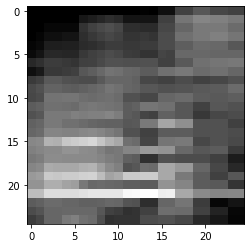

In [47]:
plt.imshow(normalized_image, cmap="gray") 

In [48]:
data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [49]:
def wav_to_png_file(wav_file_name) :
  split_string = wav_file_name.split(".")
  png_file_name = split_string[0] + ".png"
  return png_file_name

In [50]:
png_file_name = wav_to_png_file('100263-2-0-117.wav')

print(png_file_name)

100263-2-0-117.png


In [52]:
Images = []
ClassIDs = []

for index, row in data_frame.iterrows():
  remainder = index%500
  if (index > 0 and remainder == 0) :
    print(f'index : {index}')
   
  slice_file_name = row['slice_file_name']
  classID = row['classID']
  png_file_name = wav_to_png_file(slice_file_name)

  file_path = '/content/newfile'+png_file_name

  ClassIDs.append(classID)

  Images.append(normalized_image)

index : 500
index : 1000
index : 1500
index : 2000
index : 2500
index : 3000
index : 3500
index : 4000
index : 4500
index : 5000
index : 5500
index : 6000
index : 6500
index : 7000
index : 7500
index : 8000
index : 8500


In [53]:
len(ClassIDs)

8732

In [54]:
len(Images)

8732

In [55]:
df_image2 = pd.DataFrame()
df_image2["Image"] = Images
df_image2["ClassId"] = ClassIDs
df_image2

,Image,ClassId
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",3
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",2
...,...,...
8727,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8728,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8729,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1
8730,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,...",1


In [56]:
df_image2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [63]:
df_image2.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_All.csv',index=False)

In [64]:
df_Image_All = pd.read_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_All.csv')

df_Image_All

,Image,ClassId
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,3
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,2
...,...,...
8727,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8728,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8729,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1
8730,[[ 0 0 0 0 0 0 0 0 0 0 0 ...,1


In [65]:
df_Image_All.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Image    8732 non-null   object
 1   ClassId  8732 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 136.6+ KB


In [66]:
X = df_Image_All.drop('ClassId',axis=1)
y = df_Image_All.loc[:,'ClassId']

In [67]:
# Print the newly created DataFrame
X.head()

,Image
0,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
1,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
2,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
3,[[ 0 0 0 0 0 0 0 0 0 0 0 ...
4,[[ 0 0 0 0 0 0 0 0 0 0 0 ...


In [68]:
y

0       3
1       2
2       2
3       2
4       2
       ..
8727    1
8728    1
8729    1
8730    1
8731    1
Name: ClassId, Length: 8732, dtype: int64

In [69]:
X_train, X_temporary ,y_train ,y_temporary = train_test_split(X,y,train_size=0.8)
X_val ,X_test ,y_val,y_test = train_test_split(X_temporary,y_temporary,train_size=0.5)

In [70]:
print(f'Length of data set {len(X)}')
print(f'Length of train data set {len(X_train)}')
print(f'Length of validation data set {len(X_val)}')
print(f'Length of test data set {len(X_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [71]:
print(f'Length of data set {len(y)}')
print(f'Length of train data set {len(y_train)}')
print(f'Length of validation data set {len(y_val)}')
print(f'Length of test data set {len(y_test)}')

Length of data set 8732
Length of train data set 6985
Length of validation data set 873
Length of test data set 874


In [72]:
X_train.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_train.csv',index=False)
X_val.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_val.csv',index=False)
X_test.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_X_test.csv',index=False)

y_train.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_train.csv',index=False)
y_val.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_val.csv',index=False)
y_test.to_csv('/content/drive/MyDrive/UrbanSoundNewFile/Image_y_test.csv',index=False)